<center>
    <h1 id='clustering' style='color:#7159c1'>⚙️ Clustering ⚙️</h1>
        <i>Unsupervisioned Machine Learning Algorithms to Cluster Datas</i>
</center>

---

Clustering is a Machine Learning Technique to classify the datas into groups (clusters) following patterns the algorithm has learned. These patterns are not explicity, that means that once a model has clustered the datas, it is a task to Data Scientists figure out what are the patterns and why they have been choosen.

Versions-wise, there a lot of them, but the two main ones are K-Means and Hierarchial, being:

> **K-Means Clustering** - `applies K-Nearest Neighbors to create the clusters`;

> **Hierarchial Clustering** - `applies K-Neartes Neighbors to create the clusters AND there is a hierarchial / importance relationship between the groups`.

<h1 id='0-k-means-clustering' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>0 | K-Means Clustering</h1>

`K-Means` defines CENTROIDS and it's goal is to find the perfect position for each centroid and its territory  (TESSALATION). When creating this algorithm, you have to pay attention to three parameters:

> **n_clusters** - `number of Clusters (K)`;

> **max_iter** - `number of iterations`;

> **n_init** - `gets the Centroids' Position has the least total distance between each point and its centroid, the optimal clustering`.

<br />

Besides, since K-Means clustering is sensitive to scale, it can be a good idea RESCALE or NORMALIZE data with extreme values. Our features are already roughly on the same scale, so we'll leave them as-is.

In [2]:
# ---- Settings ----
from sklearn.cluster import KMeans # pip install sklear
import pandas as pd # pip install pandas
import matplotlib.pyplot as plt # pip install matplotlib
import mplcyberpunk # pip install cyberpunk
import seaborn as sns # pip install seaborn

plt.style.use('cyberpunk')

# ---- Reading Dataset ----
housing_df = pd.read_csv('./datasets/housing.csv')
housing_df.head()
X = housing_df.loc[:, ['Latitude', 'Longitude', 'MedInc']]
X.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


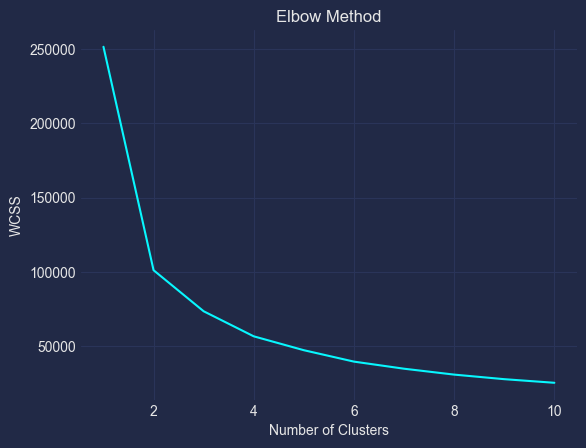

In [3]:
# ---- WCSS and Elbow Method ----
#
# - their function is to check out how many clusters is great to the process
#
wcss = []

# testing out with 1 to 11 clusters
for cluster in range(1, 11):
    kmeans = KMeans(
        n_clusters=cluster # number of clusters to be identifed
        , init='k-means++'
        , max_iter=300 # number of iterations for each run on 'n_init'
        , n_init=10 # number of runs (centroids iteration
        , random_state=20241901
    )
    
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# ---- Plotting the Results ----
#
# - we often choose the amount of clusters where the WCSS starts to level off (Elbow Method)
#
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

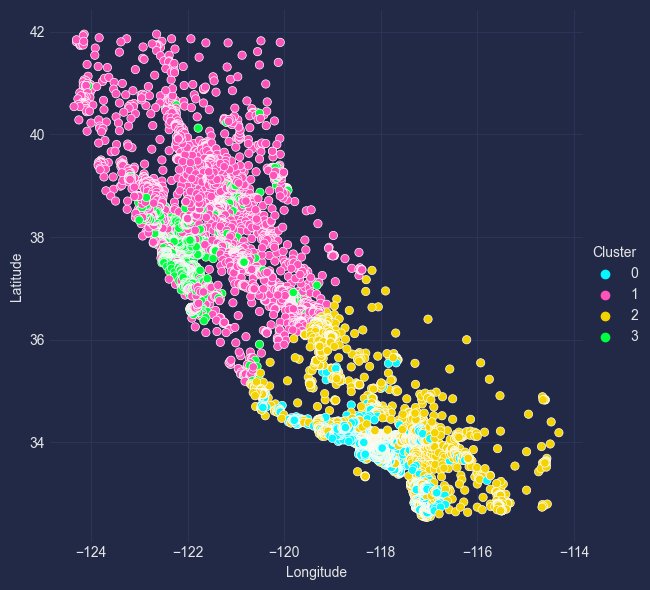

In [6]:
# ---- Usgin K-means ----
#
# - consider that 4 clusters was the great amount and we will
# repeat the K-Means centroids moviment 10 times
#
kmeans = KMeans(
    n_clusters=4
    , init='k-means++'
    , max_iter=300
    , n_init=10
    , random_state=20241901
)

X['Cluster'] = kmeans.fit_predict(X)
X['Cluster'] = X['Cluster'].astype('category')

# ---- Plotting the Results ----
sns.relplot(
    data=X
    , x='Longitude'
    , y='Latitude'
    , hue='Cluster'
    , height=6
)
plt.show()

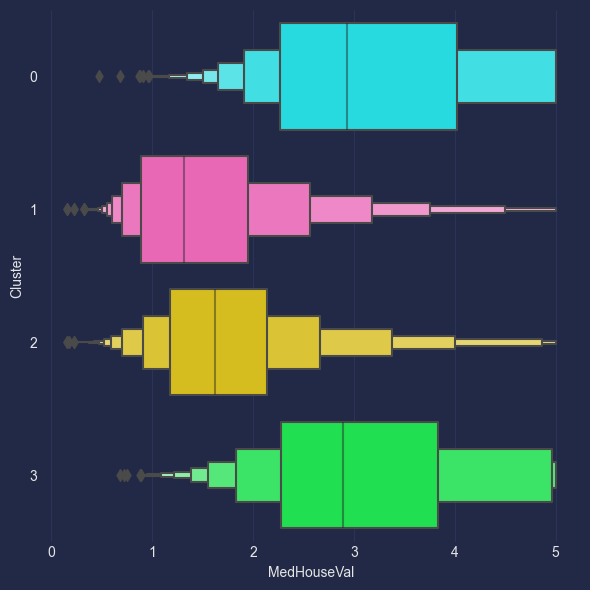

In [8]:
# OBS.: Comparing the Target - box-plots show the distribution of
#the target within each cluster. If the clustering is informative,
# these distributions should, for the most part, separate across
# MedHouseVal (Target), which is indeed what we see.
X["MedHouseVal"] = housing_df["MedHouseVal"]
sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=6);

<h1 id='1-hierarchial-clustering' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>1 | Hierarchial Clustering</h1>

`Hierarchial Clustering` the datas and each cluster has a weight that represents its position in a hierarchy between them. When creating this algorithm, you have to pay attention to three parameters:

> **n_clusters** - `number of Clusters (K)`;

> **linkage** - `type of linkage in the hierarchy`;

> **afinity** - `variation of the algorithm (Euclidean is the most common)`.

<br />

Besides, since Hierarchial clustering is sensitive to scale, it can be a good idea RESCALE or NORMALIZE data with extreme values. Our features are already roughly on the same scale, so we'll leave them as-is.

In [ ]:
# ---- Importing Libraries ----
from scipy.cluster.hierarchy import dendrogram, linkage # pip install cipy
from sklearn.cluster import AgglomerativeClustering # pip install sklearn
from sklearn.cluster import KMeans
import pandas as pd # pip install pandas
import matplotlib.pyplot as plt # pip install matplotlib
import mplcyberpunk # pip install mplcyberpunk

# ---- Reading Dataset ----
housing_df = pd.read_csv('./datasets/housing.csv')

# ---- Dendrograms and Linkage Visualization ----
#
# - with this visualization is possible to know how many clusters
# (N_clusters parameter) will best fit the algorithm
#
linkage_data = linkage(housing_df, method='ward', metric='euclidean')
dendrogram(linkage_data)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [65.0, 65.0, 75.0, 75.0],
  [33.75, 33.75, 70.0, 70.0],
  [10.0, 10.0, 51.875, 51.875],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [103.75, 103.75, 143.75, 143.75],
  [85.0, 85.0, 123.75, 123.75],
  [30.9375, 30.9375, 104.375, 104.375],
  [175.0, 175.0, 185.0, 185.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [180.0, 180.0, 202.5, 202.5],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [191.25, 191.25, 233.75, 233.75],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [265.0, 265.0, 283.75, 283.75],
  [325.0, 325.0, 335.0, 335.0],
  [345.0, 345.0, 355.0, 355.0],
  [330.0, 330.0, 350.0, 350.0],
  [315

Error in callback <function flush_figures at 0x00000241B129E5F0> (for post_execute):


In [ ]:
# ---- Applying Clusterization ----
hierarchial_clustering = AgglomerativeClustering(
    n_clusters=2
    , affinity='euclidean'
    , linkage='ward'
)

labels = hierarchial_cluster.fit_predict(housing_df)

# ---- Plotting the Result ----
#plt.scatter(x, y, c=labels)
#plt.show()

---

<h1 id='reach-me' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>📫 | Reach Me</h1>

> **Email** - [csfelix08@gmail.com](mailto:csfelix08@gmail.com?)

> **Linkedin** - [linkedin.com/in/csfelix/](https://www.linkedin.com/in/csfelix/)

> **GitHub:** - [CSFelix](https://github.com/CSFelix)

> **Kaggle** - [DSFelix](https://www.kaggle.com/dsfelix)

> **Portfolio** - [CSFelix.io](https://csfelix.github.io/).